In [11]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

In [12]:
b = .047
m = 1
g = 9.80665

V_0 = 45
theta = np.pi/4

V0_X = V_0 * np.cos(theta)
V0_Y = V_0 * np.sin(theta)

X_0 = .0
Y_0 = 1e-3

In [13]:
simulation_time = 10
simulation_step = 1e-3

iterations = int(simulation_time / simulation_step)

time = np.linspace(.0, simulation_time, iterations)
time_span = [min(time), max(time)]

In [14]:
def dsdt(_, s):
    _, vx, _y, vy = s

    if _y < 0:
        vy = 0

    return [
        vx,
        (-b*vx**2) / m,
        vy,
        ((-b*vy**2) / m) - g
    ]

sol = solve_ivp(
    dsdt,
    time_span,
    [X_0, V0_X, Y_0, V0_Y],
    t_eval=time
)

Text(0, 0.5, 'y(t)')

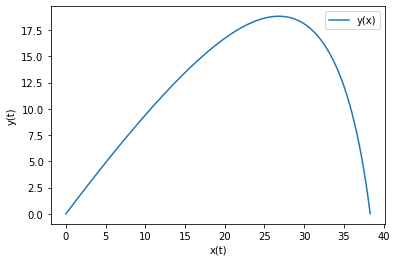

In [15]:
x = sol.y[0]
y = sol.y[2]

# y index where y = 0
y_zero_index = np.argmin(np.abs(y))

plt.plot(x[:y_zero_index], y[:y_zero_index])
plt.legend(['y(x)'])
plt.xlabel('x(t)')
plt.ylabel('y(t)')